# Assignment 3 revision

In [1]:
import re
import time

import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

## Read CSV

In [2]:
#covert a string that is camelcase into snake_case
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df_project = pd.read_csv('projects.csv', index_col='projectid')
df_outcomes = pd.read_csv('outcomes.csv', index_col='projectid')
df_project['fully_funded'] = df_outcomes['fully_funded']

In [3]:
df_project = df_project.dropna()
df_project = df_project[df_project['date_posted'] >= '2011-01-01']
df = df_project[df_project['date_posted'] <= '2013-12-31']
df.columns = [camel_to_snake(col) for col in df.columns]
df.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
projectid,,,,,,,,,,,,,,,,,,,,,
62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,Elgin School District U-46,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,School Administrative Unit 10,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,2.102990e+11,38.249919,-85.722310,Louisville,KY,40206.0,urban,Jefferson Co School District,...,highest poverty,Grades PreK-2,30.0,935.16,1100.19,25.0,t,f,2013-12-31,f
0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,1.201980e+11,30.507978,-86.132003,Freeport,FL,32439.0,rural,Walton Co School District,...,highest poverty,Grades PreK-2,30.0,809.32,952.14,17.0,f,f,2013-12-31,t
72d58b8e22adbe6e6aab65d8b2ab4973,0793851e2f40ecc28e40513622aea670,a180e99ef60be5a9c5f96e21f9868f13,5.606090e+11,44.097156,-104.622147,Upton,WY,82730.0,rural,Weston Co School District 7,...,moderate poverty,Grades PreK-2,30.0,297.85,350.41,21.0,f,f,2013-12-31,t


## Explore Data

In [4]:
df.count()

teacher_acctid                            197947
schoolid                                  197947
school_ncesid                             197947
school_latitude                           197947
school_longitude                          197947
school_city                               197947
school_state                              197947
school_zip                                197947
school_metro                              197947
school_district                           197947
school_county                             197947
school_charter                            197947
school_magnet                             197947
school_year_round                         197947
school_nlns                               197947
school_kipp                               197947
school_charter_ready_promise              197947
teacher_prefix                            197947
teacher_teach_for_america                 197947
teacher_ny_teaching_fellow                197947
primary_focus_subjec

In [5]:
# figure out which variables contain null values. 
# First, melt our data into long format.
# print a table telling the no of null and non-null instances.
df_lng = pd.melt(df)
null_variables = df_lng.value.isnull()
pd.crosstab(df_lng.variable, null_variables)

value,False
variable,
date_posted,197947
eligible_almost_home_match,197947
eligible_double_your_impact_match,197947
fulfillment_labor_materials,197947
fully_funded,197947
grade_level,197947
poverty_level,197947
primary_focus_area,197947
primary_focus_subject,197947


## Pre Process Data

In [6]:
def check_missing(df):
    return [col for col in df.columns if any(df[col].isnull()) == True]

def fill_missing(df, col_name, method):
    if method == 'mean':
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif method == 'median':
        df[col_name] = df[col_name].fillna(df[col_name].median())
    elif method == 'zero':
        df[col_name] = df[col_name].fillna(0)
        
missing_cols = check_missing(df)
missing_cols

[]

In [7]:
for col in missing_cols:
    fill_missing(df, col, 'mean')
check_missing(df)

[]

As we can see, there is no missing values.

In [8]:
label_name = 'fully_funded'
exclude_names = ['schoolid', 'teacher_acctid', 'school_city', 'school_zip',
                 'school_district', 'date_posted', 'school_county']
feature_names = [col for col in df.columns if col != label_name and col not in exclude_names]
df = df.sort_values(by='date_posted')
df = df[feature_names + [label_name]]

# replace f with 0, t with 1
df = df.replace('f', 0).replace('t', 1)

In [9]:
# encode data by unique number idx
encoded_features = ['school_state', 'school_metro', 'resource_type', 'poverty_level',
                    'grade_level', 'primary_focus_area', 'primary_focus_subject',
                    'secondary_focus_subject', 'secondary_focus_area', 'teacher_prefix']
for col in encoded_features:
    df[col] = df[col].astype('category').cat.codes
df.head()

,school_ncesid,school_latitude,school_longitude,school_state,school_metro,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,fully_funded
projectid,,,,,,,,,,,,,,,,,,,,,
5642f0ce487ab43a26b51b9af9820a36,3.200060e+11,36.178444,-115.113045,33,2,0,0,0,0,0,...,3,1,3,35.0,722.71,850.25,18.0,1,0,1
ee279dfe26913547e95a55175a344e8b,3.600139e+11,40.806160,-73.948020,34,2,1,0,0,1,0,...,3,0,3,35.0,2076.99,2443.52,16.0,0,0,0
84adb497b27d78f5dd81462e977f9632,3.600098e+11,40.745975,-73.879639,34,2,0,0,0,0,0,...,2,1,0,35.0,826.58,972.45,30.0,0,0,0
23961f66f372f2d5f1e94dc3719abc2d,1.301740e+11,33.650887,-84.127312,10,1,0,0,0,0,0,...,3,1,0,35.0,296.30,348.59,500.0,0,0,1
b58bc950a370da38f4832f3a9e120ee3,1.024300e+10,32.398838,-86.278961,1,2,0,0,0,0,0,...,2,1,0,35.0,911.60,1072.47,42.0,0,0,1


##  Generate Features

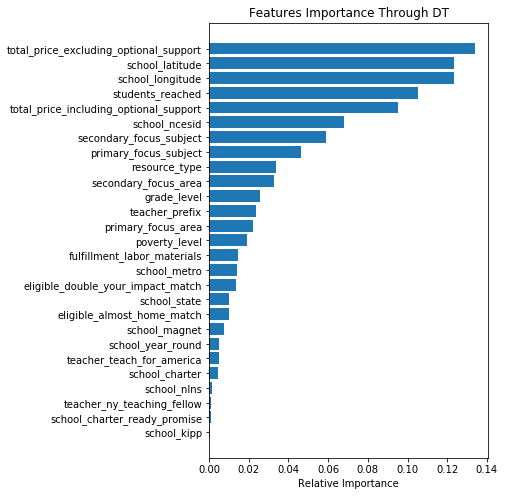

In [10]:
def sort_features_through_dt(df_features, df_label):
    features = df_features.columns
    model = DecisionTreeClassifier()
    model.fit(df_features, df_label)
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    plt.figure(figsize=(5, 8))
    plt.barh(padding, importances[sorted_idx], align='center')
    plt.yticks(padding, np.asarray(features)[sorted_idx])
    plt.xlabel("Relative Importance")
    plt.title("Features Importance Through DT")
    
    return list(np.asarray(features)[sorted_idx][::-1])


df_features, df_label = df[feature_names], df[label_name]

# sort all the features by importance
sorted_features = sort_features_through_dt(df_features, df_label)

In [11]:
# Select top 2/3 features
count = int(len(sorted_features) * 0.67)
df_features = df_features[sorted_features[:count]]
df_features.head()

,total_price_excluding_optional_support,school_latitude,school_longitude,students_reached,total_price_including_optional_support,school_ncesid,secondary_focus_subject,primary_focus_subject,resource_type,secondary_focus_area,grade_level,teacher_prefix,primary_focus_area,poverty_level,fulfillment_labor_materials,school_metro,eligible_double_your_impact_match,school_state
projectid,,,,,,,,,,,,,,,,,,
5642f0ce487ab43a26b51b9af9820a36,722.71,36.178444,-115.113045,18.0,850.25,3.200060e+11,5,15,3,3,3,3,3,1,35.0,2,1,33
ee279dfe26913547e95a55175a344e8b,2076.99,40.806160,-73.948020,16.0,2443.52,3.600139e+11,17,15,3,4,3,3,3,0,35.0,2,0,34
84adb497b27d78f5dd81462e977f9632,826.58,40.745975,-73.879639,30.0,972.45,3.600098e+11,5,1,2,3,0,2,0,1,35.0,2,0,34
23961f66f372f2d5f1e94dc3719abc2d,296.30,33.650887,-84.127312,500.0,348.59,1.301740e+11,15,23,3,3,0,3,2,1,35.0,1,0,10
b58bc950a370da38f4832f3a9e120ee3,911.60,32.398838,-86.278961,42.0,1072.47,1.024300e+10,23,17,2,2,0,3,4,1,35.0,2,0,1


In [12]:
# normalize
df_features = preprocessing.MinMaxScaler().fit_transform(df_features)
df_features = preprocessing.normalize(df_features, norm='max')

## Build Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_recall_curve, roc_auc_score, roc_curve, auc,
                             precision_score, recall_score, f1_score)

In [14]:
# split train set and test set
df_features, df_label = df_features[:10000], df_label[:10000]
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.2)

In [32]:
classifier_constructors = {
    'LR': LogisticRegression,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'SVM': SVC,
    'RF': RandomForestClassifier,
    'GB': GradientBoostingClassifier,
    'BG': BaggingClassifier
}

grid = dict()
grid['LR'] = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001 * (10**i) for i in range(5)]
}
grid['DT'] = {
    'max_depth': [1, 20, 50],
    'criterion': ['gini', 'entropy']
}
grid['KNN'] = {
    'n_neighbors': [1, 5, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
grid['SVM'] = {
    'C': [0.1, 0.5, 1],
    'gamma': [1e-3, 1e-4],
    'kernel': ['rbf', 'linear']
}
grid['RF'] = {
    'n_estimators': [1, 5, 10],
    'max_depth': [1, 5, 10], 
    'max_features': ['sqrt', 'log2']
}
grid['GB'] = {
    'n_estimators': [1, 5, 10],
    'learning_rate' : [0.1, 0.5]
}
grid['BG'] = {
    'n_estimators': [1, 5, 10],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

## temporal validation
- Use test data to validate directly.
- KFold cross validation is not suitable for this problem, because this full_funded dataset has a time component.
- Use f1-score to find the best params.

In [33]:
import warnings
warnings.filterwarnings('ignore')

def classify(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    y_pre = clf.predict(X_test)
    return f1_score(y_test, y_pre)

def select_best_parameters(X_train, y_train, X_test, y_test):
    # iter three times
    number = 3
    # store all the scores and parameters
    classifiers = {}
    results = {}
    for k, clf_constructor in classifier_constructors.items():
        results[k] = []
        params = grid[k]
        for p in ParameterGrid(params):
            clf = clf_constructor(**p)
            f1_scores = [classify(X_train, y_train, X_test, y_test, clf) for i in range(number)]
            f1_score_mean = sum(f1_scores) / len(f1_scores)
            results[k].append((p, f1_score_mean))
    return results
        
results = select_best_parameters(X_train, y_train, X_test, y_test)
classifiers = {}
best_params = {}

# find best params
for k, p_list in results.items():
    p = max(p_list, key=lambda x: x[1])
    best_params[k] = p
    clf = classifier_constructors[k](**p[0])
    clf.fit(X_train, y_train)
    classifiers[k] = clf
    
for k, p in best_params.items():
    print(k, ': ', p)

LR :  ({'C': 1.0, 'penalty': 'l1'}, 0.79075097790075366)
KNN :  ({'algorithm': 'auto', 'n_neighbors': 5}, 0.73755147884687366)
DT :  ({'criterion': 'gini', 'max_depth': 1}, 0.78271454656116857)
SVM :  ({'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, 0.7831912302070646)
RF :  ({'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}, 0.80405749269168558)
GB :  ({'learning_rate': 0.5, 'n_estimators': 10}, 0.80270174191254873)
BG :  ({'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 5}, 0.75630010915433876)


## Evaluate Classifier

### Calculate precision, recall, f1, and auc

In [34]:
# evalute metrics
def evaluate_classifier(y_test, y_pre, y_prob, cost_time=0):
    return {
        'precision': float("%.4f" % precision_score(y_test, y_pre)),
        'recall': float("%.4f" % recall_score(y_test, y_pre)),
        'f1': float("%.4f" % f1_score(y_test, y_pre)),
        'auc': float("%.4f" % roc_auc_score(y_test, y_prob)),
        'cost_time': float("%.4f" % cost_time)
    }

def evaluate_classifiers(X_test, y_test, threshold):
    metrics = dict()
    probas = dict()
    for k, clf in classifiers.items():
        start = time.time()
        if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
        else:
            y_prob = clf.decision_function(X_test)
        y_pre = np.asarray([1 if run >= threshold else 0 for run in y_prob])
        cost_time = time.time() - start
        metrics[k] = evaluate_classifier(y_test, y_pre, y_prob, cost_time)
        probas[k] = y_prob
    return metrics, probas
        
metrics, probas = evaluate_classifiers(X_test, y_test, 0.05)
metrics

{'BG': {'auc': 0.6963,
  'cost_time': 0.0029,
  'f1': 0.7843,
  'precision': 0.6545,
  'recall': 0.9782},
 'DT': {'auc': 0.6167,
  'cost_time': 0.0008,
  'f1': 0.7827,
  'precision': 0.643,
  'recall': 1.0},
 'GB': {'auc': 0.7572,
  'cost_time': 0.0009,
  'f1': 0.7827,
  'precision': 0.643,
  'recall': 1.0},
 'KNN': {'auc': 0.6388,
  'cost_time': 0.2264,
  'f1': 0.7836,
  'precision': 0.6498,
  'recall': 0.9868},
 'LR': {'auc': 0.7,
  'cost_time': 0.0008,
  'f1': 0.7834,
  'precision': 0.644,
  'recall': 1.0},
 'RF': {'auc': 0.7307,
  'cost_time': 0.003,
  'f1': 0.7827,
  'precision': 0.643,
  'recall': 1.0},
 'SVM': {'auc': 0.7166,
  'cost_time': 0.2044,
  'f1': 0.7832,
  'precision': 0.6436,
  'recall': 1.0}}

### Draw AUC

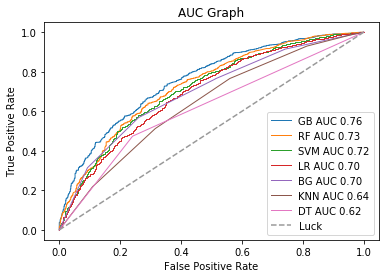

In [35]:
def draw_auc(probas, y_test):
    plt.clf()
    auc_list = []
    for k, prob in probas.items():
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        roc_auc = auc(fpr, tpr)
        auc_list.append((k, roc_auc))
        
    auc_list.sort(key=lambda x: x[1], reverse=True)
    
    for k, roc_auc in auc_list:
        fpr, tpr, thresholds = roc_curve(y_test, probas[k])
        plt.plot(fpr, tpr, lw=1, label=('%s AUC %.2f' % (k, roc_auc)))
    
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Graph')
    plt.legend(loc="lower right")

draw_auc(probas, y_test)

### Draw Precision-Recall Curves

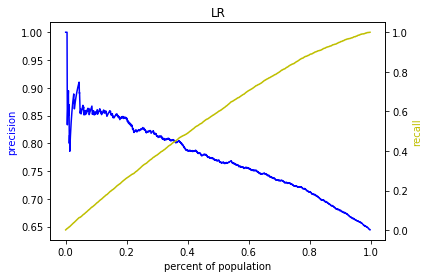

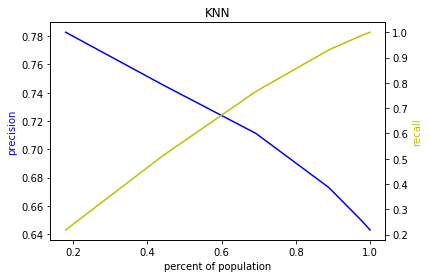

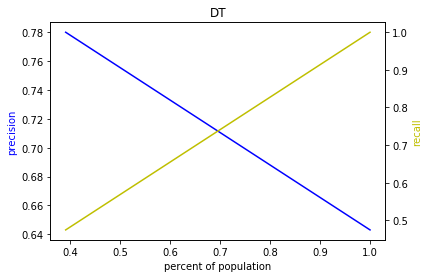

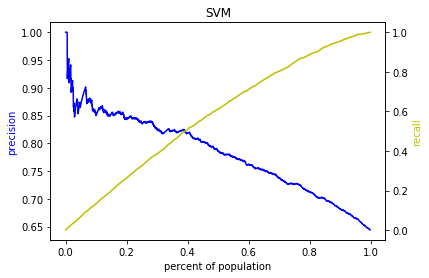

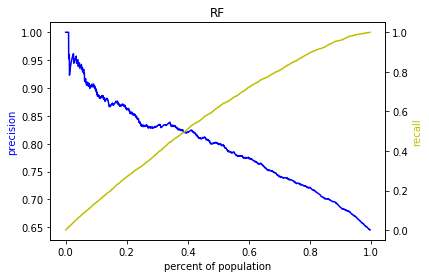

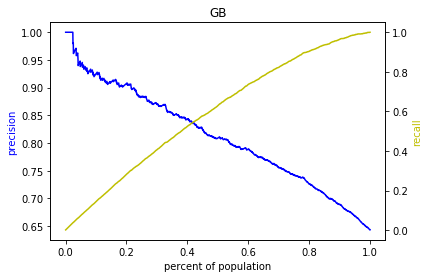

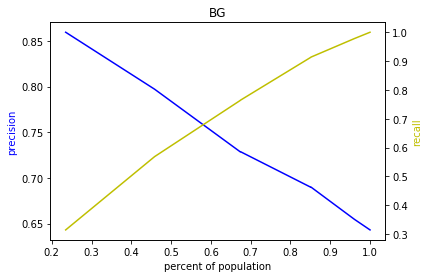

In [36]:
def plot_precision_recall(y_test, key):
    plt.clf()
    y_prob = probas[key]
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_prob)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_per_thresh = []
    number_scored = len(y_prob)
    for value in pr_thresholds:
        num_above_thresh = len(y_prob[y_prob >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_per_thresh.append(pct_above_thresh)
    pct_per_thresh = np.array(pct_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_per_thresh, recall_curve, 'y')
    ax2.set_ylabel('recall', color='y')
    plt.title(key)
    plt.show()
    
for key in probas.keys():
    plot_precision_recall(y_test, key)

### Draw Precision, Recall, Auc and F1

In [37]:
data = dict()
data['key'] =  ['precision', 'recall', 'f1', 'auc', 'cost_time']

for k, metric in metrics.items():
    data[k] = [metric[item] for item in data['key']]

df_result = pd.DataFrame(data)

df_result = df_result.set_index('key')
df_result.head()

,BG,DT,GB,KNN,LR,RF,SVM
key,,,,,,,
precision,0.6545,0.6430,0.6430,0.6498,0.6440,0.6430,0.6436
recall,0.9782,1.0000,1.0000,0.9868,1.0000,1.0000,1.0000
f1,0.7843,0.7827,0.7827,0.7836,0.7834,0.7827,0.7832
auc,0.6963,0.6167,0.7572,0.6388,0.7000,0.7307,0.7166
cost_time,0.0029,0.0008,0.0009,0.2264,0.0008,0.0030,0.2044


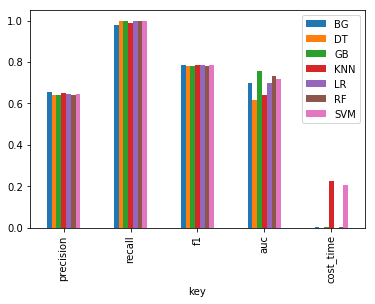

In [38]:
df_result.plot.bar();
plt.show()

### The Best Classifier

In [39]:
# find the best one
def find_the_best_model(target='auc'):
    metrics_list = list(metrics.items())
    metrics_list.sort(key=lambda x: x[1][target], reverse=True)
    return metrics_list[0]

best = find_the_best_model('precision')
best

('BG',
 {'auc': 0.6963,
  'cost_time': 0.0029,
  'f1': 0.7843,
  'precision': 0.6545,
  'recall': 0.9782})

In [40]:
def get_baseline_metric():
    base_clf = DummyClassifier()
    base_clf.fit(X_train, y_train)
    start = time.time()
    y_pre = base_clf.predict(X_test)
    cost_time = time.time() - start
    y_prob = base_clf.predict_proba(X_test)[:, 1]
    return evaluate_classifier(y_test, y_pre, y_prob, cost_time)

baseline_metric = get_baseline_metric()
('Baseline', baseline_metric)

('Baseline',
 {'auc': 0.4993,
  'cost_time': 0.0002,
  'f1': 0.6471,
  'precision': 0.6426,
  'recall': 0.6516})

## Compare to Baseline

In [41]:
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]
threshold_metrics = {}
for threshold in thresholds:
    threshold_metrics[str(threshold)] = evaluate_classifiers(X_test, y_test, threshold)[0]   

In [42]:
data = dict()
data['key'] =  ['best-%s' % item for item in thresholds] + ['baseline']

for k in ['recall', 'f1', 'auc', 'precision', 'cost_time']:
    data[k] = [threshold_metrics[str(threshold)][best[0]][k] for threshold in thresholds]
    data[k].append(baseline_metric[k])

    
df_result = pd.DataFrame(data)
df_result = df_result.set_index('key')
df_result = df_result.sort_values(by='precision')[::-1]
df_result.head(10)

,auc,cost_time,f1,precision,recall
key,,,,,
best-0.5,0.6963,0.0028,0.7461,0.7287,0.7644
best-0.3,0.6963,0.0030,0.7862,0.6900,0.9137
best-0.2,0.6963,0.0032,0.7843,0.6545,0.9782
best-0.1,0.6963,0.0037,0.7843,0.6545,0.9782
best-0.05,0.6963,0.0029,0.7843,0.6545,0.9782
best-0.02,0.6963,0.0037,0.7843,0.6545,0.9782
best-0.01,0.6963,0.0030,0.7843,0.6545,0.9782
baseline,0.4993,0.0002,0.6471,0.6426,0.6516


As we see, when threshold equals 0.5, the classifier perform best.
But baseline classifier cost the least.